In [3]:
%pip install numpy pandas matplotlib matplotlib-venn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Probabilistic Reasoning and Modeling using Python

**Assignments 1 & 2 — Computations in Python (Jupyter Notebook)**

**Author:** Piyush Kumar Sharma  
**Date:** 28 Sep 2025

**Name:** Piyush Kumar Sharma   **Roll No:** 2401730173   **Course:** B.Tech CSE (AI & ML)   **Semester:** 3   **Section:** A

---


## Assignment 1

### Q1: Bike prices
The prices of five bikes in a shop are: ₹12,000, ₹15,000, ₹18,000, ₹20,000, ₹50,000

(a) What is the mean price of a bike?

(b) What is the median price of a bike?

(c) If the shop owner wants to make the bikes seem affordable, which "average" (mean or median) should they advertise? Why?


In [4]:
# Bike prices analysis
prices = [12000, 15000, 18000, 20000, 50000]

# (a) Calculate mean
mean_price = sum(prices) / len(prices)

# (b) Calculate median
sorted_prices = sorted(prices)
n = len(prices)
median_price = sorted_prices[n//2]  # For odd number of elements

print("Bike Prices Analysis:")
print(f"Prices: {prices}")
print(f"Sorted: {sorted_prices}")
print()
print(f"(a) Mean price: ₹{mean_price:,.0f}")
print(f"(b) Median price: ₹{median_price:,.0f}")
print()
print("(c) Which average to advertise?")
print(f"The shop owner should advertise the MEDIAN (₹{median_price:,.0f})")
print("Because the median is not affected by the high price of ₹50,000")
print(f"The mean (₹{mean_price:,.0f}) is pulled up by this outlier")


Bike Prices Analysis:
Prices: [12000, 15000, 18000, 20000, 50000]
Sorted: [12000, 15000, 18000, 20000, 50000]

(a) Mean price: ₹23,000
(b) Median price: ₹18,000

(c) Which average to advertise?
The shop owner should advertise the MEDIAN (₹18,000)
Because the median is not affected by the high price of ₹50,000
The mean (₹23,000) is pulled up by this outlier


**Answer (c):** The shop owner should advertise the **median** price because the median is robust to outliers (the ₹50,000 bike). The mean is pulled upward by that high price and may give a misleading impression.

### Q2: Relationship between histogram shape and mean/median/mode in a left-skewed distribution

In a left-skewed (negatively skewed) distribution:

- mean < median < mode

The mean is pulled toward the long left tail, the median is less sensitive, and the mode remains near the peak.

### Q3: Exam scores for 10 students
Data (out of 100): 85, 92, 78, 90, 85, 67, 88, 95, 85, 72

(a) Calculate the mean, median, and mode.
(b) Describe the shape of the distribution.
(c) Find the five-number summary.


In [5]:
from collections import Counter
import statistics as st

scores = [85, 92, 78, 90, 85, 67, 88, 95, 85, 72]
n = len(scores)
sorted_scores = sorted(scores)

mean_scores = sum(scores) / n
# median for even n: average of two middle values
median_scores = (sorted_scores[n//2 - 1] + sorted_scores[n//2]) / 2
# mode (could be multimodal; statistics.mode raises for no unique mode)
freq = Counter(scores)
mode_scores = [k for k,v in freq.items() if v == max(freq.values())]

# Five-number summary
minimum = sorted_scores[0]
maximum = sorted_scores[-1]
q1 = st.median(sorted_scores[:n//2])   # lower quartile
q3 = st.median(sorted_scores[n//2:])   # upper quartile

mean_scores, median_scores, mode_scores, {"min": minimum, "Q1": q1, "median": median_scores, "Q3": q3, "max": maximum}


(83.7, 85.0, [85], {'min': 67, 'Q1': 78, 'median': 85.0, 'Q3': 90, 'max': 95})

**Distribution shape:** Compare mean and median. If mean < median, distribution is left-skewed; if mean > median, right-skewed; if approximately equal, roughly symmetric.

### Q4: Population parameter vs Sample statistic

- **Parameter:** A numerical summary of a population (e.g., population mean μ). Example: the average salary of all 5,000 employees is μ = 60,000.
- **Statistic:** A numerical summary computed from a sample (e.g., sample mean x̄). Example: surveying 100 employees yields x̄ = 62,000.

### Q5: Salaries: $45,000, $50,000, $55,000, $60,000, $250,000
(a) Calculate mean and median.
(b) Which 'average' would company advertise vs what a candidate prefers?


In [6]:
salaries = [45000, 50000, 55000, 60000, 250000]
mean_salary = sum(salaries) / len(salaries)
median_salary = sorted(salaries)[len(salaries)//2]

mean_salary, median_salary


(92000.0, 55000)

**Answer (b):** The company would likely advertise the **mean** (higher because of the $250,000 outlier). A potential employee would prefer the **median**, which represents the typical employee's salary better.

### Q6: (Repeat) Exam Scores — same as Q3
You can reuse the Q3 computations above; results are identical.

### Q7: Categorical data and bar chart
Raw Data: F, H, O, F, F, O, H, F, O, F, H, F, F, F, O, H, O, F, H, F

(a) Frequency table
(b) Bar chart
(c) Most popular mode and percentage
(d) Why not a histogram?


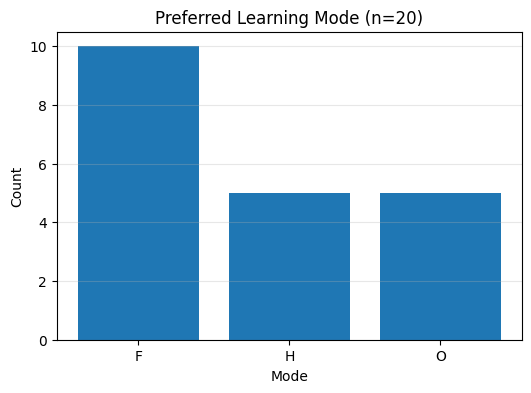

('F', 50.0)

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

modes = ["F","H","O","F","F","O","H","F","O","F","H","F","F","F","O","H","O","F","H","F"]
counts = Counter(modes)

# Frequency table
counts

# Bar chart
labels = list(counts.keys())
values = [counts[k] for k in labels]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.title("Preferred Learning Mode (n=20)")
plt.xlabel("Mode")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()

# Most popular and percentage
most_pop = max(counts, key=counts.get)
percent = (counts[most_pop] / len(modes)) * 100
most_pop, round(percent,1)


**(d) Why not histogram?** Histograms are for numerical/continuous data with bins. For categorical data, use a bar chart.

## Assignment 2

### Q1: Marbles problem
A jar contains 5 red and 7 blue marbles. Two marbles are drawn randomly one after the other without replacement. What is the probability that the second marble is red, given that the first one was blue?


In [8]:
# Marbles problem
# Initial: 5 red, 7 blue = 12 total
# After drawing blue first: 5 red, 6 blue = 11 total

red_initial = 5
blue_initial = 7
total_initial = 12

print("Initial situation:")
print(f"Red marbles: {red_initial}")
print(f"Blue marbles: {blue_initial}")
print(f"Total: {total_initial}")

# After first marble (blue) is drawn
red_remaining = 5
blue_remaining = 6 
total_remaining = 11

print("\nAfter drawing one blue marble:")
print(f"Red marbles: {red_remaining}")
print(f"Blue marbles: {blue_remaining}")
print(f"Total: {total_remaining}")

# Probability second marble is red
prob_red = red_remaining / total_remaining

print(f"\nProbability second marble is red = {red_remaining}/{total_remaining}")
print(f"                                 = {prob_red:.4f}")
print(f"                                 = {prob_red*100:.1f}%")


Initial situation:
Red marbles: 5
Blue marbles: 7
Total: 12

After drawing one blue marble:
Red marbles: 5
Blue marbles: 6
Total: 11

Probability second marble is red = 5/11
                                 = 0.4545
                                 = 45.5%


### Q2: Probability of disease given a positive test (Bayes' theorem)
Given:
- P(D) = 0.01
- P(+ | D) = 0.95 (sensitivity)
- P(+ | not D) = 0.02 (false positive rate)

Compute P(D | +).


In [9]:
# Bayes theorem problem
# Given:
P_D = 0.01          # P(Disease) = 1%
P_pos_given_D = 0.95    # P(+|Disease) = 95% 
P_pos_given_notD = 0.02 # P(+|No Disease) = 2%

# Calculate P(No Disease)
P_notD = 1 - P_D

print("Given probabilities:")
print(f"P(Disease) = {P_D}")
print(f"P(No Disease) = {P_notD}")
print(f"P(+|Disease) = {P_pos_given_D}")
print(f"P(+|No Disease) = {P_pos_given_notD}")

# Step 1: Calculate P(+) using law of total probability
P_pos = P_pos_given_D * P_D + P_pos_given_notD * P_notD

print(f"\nStep 1 - Calculate P(+):")
print(f"P(+) = P(+|D)×P(D) + P(+|¬D)×P(¬D)")
print(f"     = {P_pos_given_D}×{P_D} + {P_pos_given_notD}×{P_notD}")
print(f"     = {P_pos}")

# Step 2: Apply Bayes theorem
P_D_given_pos = (P_pos_given_D * P_D) / P_pos

print(f"\nStep 2 - Apply Bayes theorem:")
print(f"P(D|+) = P(+|D)×P(D) / P(+)")
print(f"       = {P_pos_given_D}×{P_D} / {P_pos}")
print(f"       = {P_D_given_pos:.6f}")
print(f"       = {P_D_given_pos*100:.2f}%")


Given probabilities:
P(Disease) = 0.01
P(No Disease) = 0.99
P(+|Disease) = 0.95
P(+|No Disease) = 0.02

Step 1 - Calculate P(+):
P(+) = P(+|D)×P(D) + P(+|¬D)×P(¬D)
     = 0.95×0.01 + 0.02×0.99
     = 0.0293

Step 2 - Apply Bayes theorem:
P(D|+) = P(+|D)×P(D) / P(+)
       = 0.95×0.01 / 0.0293
       = 0.324232
       = 32.42%


### Q3: Doctor's prior changed on test
Repeat Bayes with prior P(D)=0.30


In [10]:
# Bayes theorem with doctor's prior
# Same test, but now P(D) = 0.30
P_D = 0.30              # P(Disease) = 30%
P_pos_given_D = 0.95    # P(+|Disease) = 95% 
P_pos_given_notD = 0.02 # P(+|No Disease) = 2%

# Calculate P(No Disease)
P_notD = 1 - P_D

print("With doctor's prior:")
print(f"P(Disease) = {P_D}")
print(f"P(No Disease) = {P_notD}")

# Calculate P(+)
P_pos = P_pos_given_D * P_D + P_pos_given_notD * P_notD

# Apply Bayes theorem
P_D_given_pos = (P_pos_given_D * P_D) / P_pos

print(f"\nCalculation:")
print(f"P(+) = {P_pos_given_D}×{P_D} + {P_pos_given_notD}×{P_notD} = {P_pos}")
print(f"P(D|+) = {P_pos_given_D}×{P_D} / {P_pos} = {P_D_given_pos:.4f}")
print(f"       = {P_D_given_pos*100:.2f}%")


With doctor's prior:
P(Disease) = 0.3
P(No Disease) = 0.7

Calculation:
P(+) = 0.95×0.3 + 0.02×0.7 = 0.299
P(D|+) = 0.95×0.3 / 0.299 = 0.9532
       = 95.32%


### Q4 & Q5: Venn diagram counts
50 students, 30 Physics, 25 Chemistry, 15 both. Compute counts for only Physics, only Chemistry, both, and neither; then probability of only Physics.

Student distribution:
Total students: 50
Physics only: 15
Chemistry only: 10
Both subjects: 15
Neither subject: 10

Check: 15 + 10 + 15 + 10 = 50 ✓

Probability of only Physics = 15/50 = 0.3000


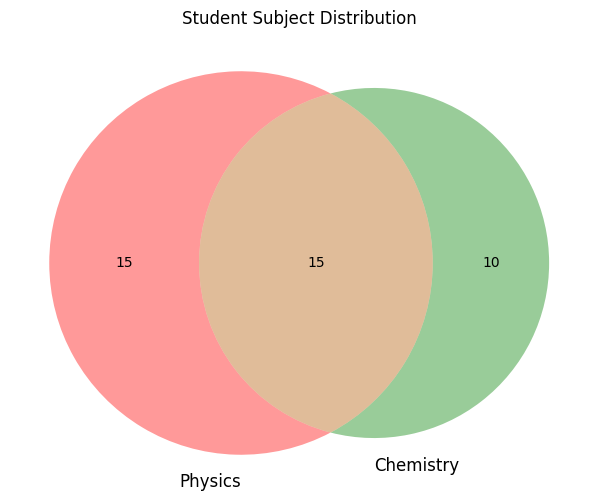

In [11]:
# Venn diagram problem
# 50 students total, 30 take Physics, 25 take Chemistry, 15 take both

total = 50
physics = 30
chemistry = 25
both = 15

# Calculate the regions
only_physics = physics - both
only_chemistry = chemistry - both
neither = total - (only_physics + only_chemistry + both)

print("Student distribution:")
print(f"Total students: {total}")
print(f"Physics only: {only_physics}")
print(f"Chemistry only: {only_chemistry}")
print(f"Both subjects: {both}")
print(f"Neither subject: {neither}")

# Check our calculation
check = only_physics + only_chemistry + both + neither
print(f"\nCheck: {only_physics} + {only_chemistry} + {both} + {neither} = {check} ✓")

# Probability of only Physics
prob_only_physics = only_physics / total
print(f"\nProbability of only Physics = {only_physics}/{total} = {prob_only_physics:.4f}")

# Draw simple Venn diagram using matplotlib_venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

plt.figure(figsize=(8, 6))
venn2(subsets=(only_physics, only_chemistry, both), 
      set_labels=('Physics', 'Chemistry'))
plt.title("Student Subject Distribution")
plt.show()
